In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr, spearmanr
from tqdm import tqdm
import numpy as np 
import math
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
def codes_to_vals(unis):
    encodings = pd.read_excel('../../data/hd2020.xlsx', sheet_name='Frequencies')
    varnames = list(encodings['varname'].unique())
    for varname in varnames:
        try:
            filtered = encodings[encodings['varname'] == varname].set_index('codevalue')
            filtered.index = filtered.index.astype(int)
            mapping = filtered['valuelabel'].to_dict()
            unis[varname] = unis[varname].replace(mapping)
        except:
            continue
    return unis

In [3]:

unis = pd.read_csv('../../data/IPEDS/university_info/hd2021.csv', encoding='latin-1', index_col=0)

unis = codes_to_vals(unis)

totals = pd.read_csv('../../out/totals.csv', index_col=0)
totals['total'] = totals['total_cs'] + totals['total_noncs']

all_trends = []
for demo in ['women', 'black', 'hispanic']:
    trends = pd.read_csv('../../out/trends_%s.csv' % demo, index_col=0, usecols=['UNITID', 'quadrant'])
    trends['demo'] = demo.capitalize()
    all_trends.append(trends)
all_trends = pd.concat(all_trends, axis=0)


unis_totals = pd.merge(unis, all_trends, left_index=True, right_index=True)

unis_stats = pd.merge(unis_totals, totals, left_index=True, right_index=True)


In [5]:
unis_stats['demo'] = unis_stats['demo'].apply(lambda x: "Hispanic or Latino" if x == "Hispanic" else x)

In [17]:
# unis_stats['total'] = unis_stats['total_cs'] + unis_stats['total_noncs']

In [18]:
# unis_stats['cs_stat_sign'] = unis_stats['cs_stat'].apply(lambda x: '+' if x > 0 else '-')

In [19]:
# pos = unis_stats[unis_stats['cs_stat_sign'] == '+']
# neg = unis_stats[unis_stats['cs_stat_sign'] == '-']
# sns.histplot(pos['total'], bins=20, color='blue')
# sns.histplot(neg['total'], bins=20, color='orange')

In [44]:
sns.color_palette('bwr', 10)[::3]

[(0.1803921568627451, 0.1803921568627451, 1.0),
 (0.7294117647058823, 0.7294117647058823, 1.0),
 (1.0, 0.7294117647058824, 0.7294117647058824),
 (1.0, 0.18039215686274512, 0.18039215686274512)]

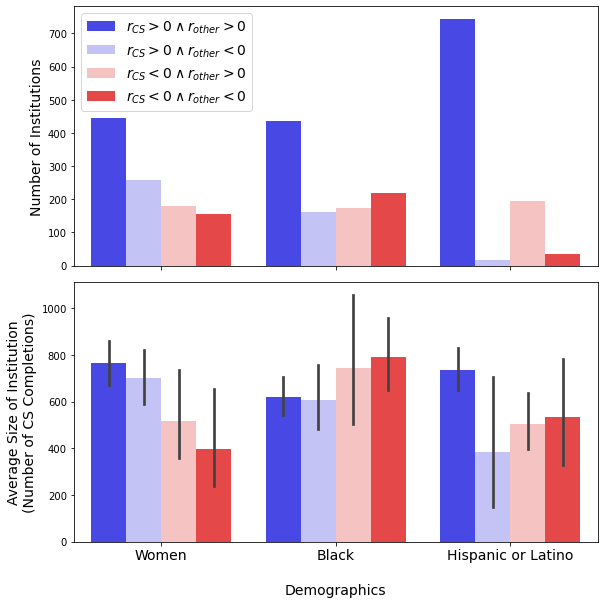

In [6]:

bwr4 = sns.color_palette('bwr', 10)[::3]
fig, axs = plt.subplots(2, 1, figsize=(8.5, 8.5), sharex=True)
sns.countplot(x='demo', hue='quadrant', data=unis_stats, palette=bwr4, ax=axs[0])#['darkblue', 'lightblue', 'pink', 'red']);
axs[0].set_ylabel('Number of Institutions', fontsize=14);
# axs[0].set_xlabel('\nDemographics', fontsize=14);
axs[0].legend(['$r_{CS} > 0 \wedge r_{other} > 0$', \
            '$r_{CS} > 0 \wedge r_{other} < 0$', \
            '$r_{CS} < 0 \wedge r_{other} > 0$', \
            '$r_{CS} < 0 \wedge r_{other} < 0$'], fontsize=14, loc='upper left');
axs[0].set_xticks(axs[0].get_xticks(), fontsize=15);
axs[0].set_xlabel('')

from matplotlib import cm 
# bwr4 = cm.get_cmap('bwr', 4)
bwr4 = sns.color_palette('bwr', 10)[::3]

# plt.figure(figsize=(10, 6))
img = sns.barplot(x='demo', hue='quadrant', y='total_cs', data=unis_stats, palette=bwr4, ax=axs[1]);
img.legend_.remove()
# sns.countplot(x='demo', hue='quadrant', data=unis_stats, palette=['darkblue', 'lightblue', 'pink', 'red']);
axs[1].set_ylabel('Average Size of Institution\n(Number of CS Completions)', fontsize=14);
axs[1].set_xlabel('\nDemographics', fontsize=14);
# axs[1].legend(None)
# axs[1].legend(['$r_{CS} > 0 \wedge r_{other} > 0$', \
#             '$r_{CS} > 0 \wedge r_{other} < 0$', \
#             '$r_{CS} < 0 \wedge r_{other} > 0$', \
#             '$r_{CS} < 0 \wedge r_{other} < 0$'], fontsize=14);
plt.xticks(fontsize=14);
plt.tight_layout()

<Figure size 720x432 with 0 Axes>

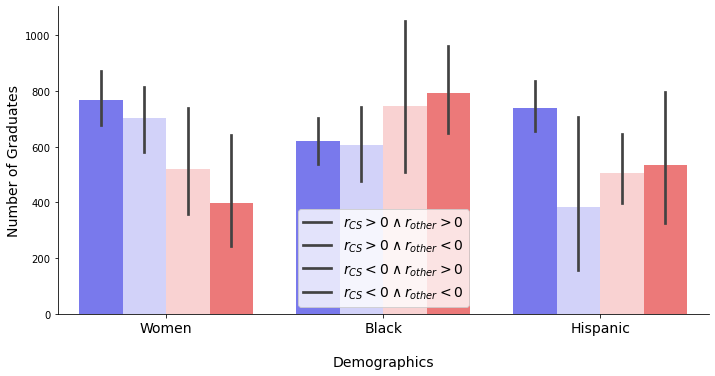

In [90]:
mapping = {'Under 1,000': 1, '1,000 - 4,999': 2, '5,000 - 9,999': 3, '10,000 - 19,999': 4, '20,000 and above': 5}
unis_stats['new_size'] = unis_stats['INSTSIZE'].replace(mapping)

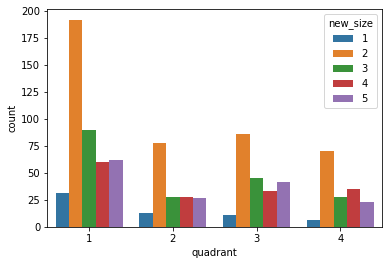

In [91]:
sns.countplot(x='quadrant', hue='new_size', data=unis_stats);

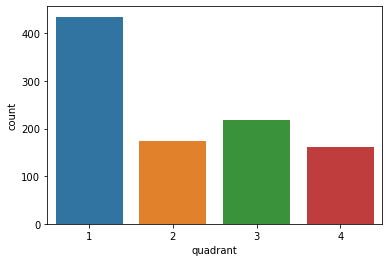

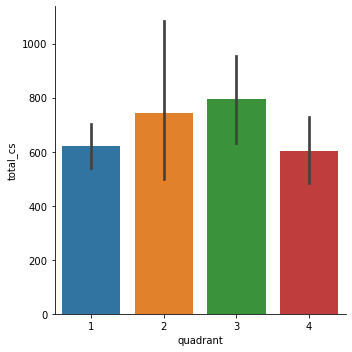

In [95]:
sns.countplot(x='quadrant', data=unis_stats);
sns.catplot(x='quadrant', y='total_cs', data=unis_stats, kind='bar');#, height=5, aspect=1.5);
# plt.yscale('log')